In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing database

In [3]:

url=r'https://drive.google.com/file/d/1_RFV7azwilfPECo70cZVK-iPMnCr6PMI/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path)
#dataset.shape
dataset.head(5)

,Unnamed: 0,148718.95,311613.29,New York,152211.77
0,123334.88,108679.17,304981.62,California,149759.96
1,101913.08,110594.11,334876.99,Florida,146121.95
2,100671.96,91790.61,249744.55,California,144259.40
3,93863.75,127320.38,249839.44,Florida,141585.52
4,91992.39,135495.07,252664.93,California,134307.35


In [4]:
X=dataset.iloc[: , :-1].values
y=dataset.iloc[:,-1].values

#print(X)

2).Handling Missing data 
first check for missing data (in this file no missing data)

In [5]:
dataset.isnull().sum()
#dataset.isnull().sum()/dataset.shape[0]*100

Unnamed: 0    2
148718.95     2
311613.29     0
New York      0
152211.77     0
dtype: int64

<AxesSubplot:>

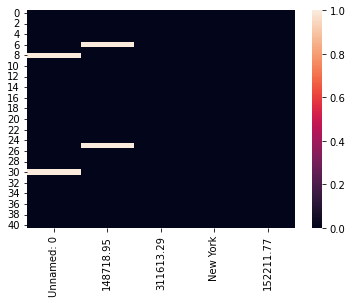

In [6]:
sns.heatmap(dataset.isnull())

In [7]:
from sklearn.impute    import SimpleImputer

impute=SimpleImputer(missing_values=np.nan , strategy='mean')
impute.fit(X[: ,0:2])
X[:,0:2]=impute.transform(X[:,0:2])

print( X)
#sns.heatmap(dataset.isnull()) why the changes in X is not reflecting on dataset

[[123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 334876.99 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 119132.66846153847 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [58145.229230769226 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532.53 105751.03 304768.73 'Florida']
 [77044.01 99281.34 140574.81 'New York']
 [64664.71 139553.16 137962.62 'California']
 [75328.87 144135.98 134050.07 'Florida']
 [72107.6 127864.55 353183.81 'New York']
 [66051.52 182645.56 118148.2 'Florida']
 [65605.48 153032.06 107138.38 'New York']
 [61994.48 115641.28 91131.24 'Florida']
 [61136.38 152701.92 88218.23 'New York'

Encoding Categorical data

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder' ,OneHotEncoder() , [3] )] , remainder='passthrough' )
X=np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 334876.99]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 119132.66846153847 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 58145.229230769226 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 0.0 1.0 61136.3

4).Splitting the dataSet 


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, train_size=0.8 ,random_state=1)
print('X_train :',X_train.shape)
print('X_test ',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)


X_train : (32, 6)
X_test  (9, 6)
y_train : (32,)
y_test : (9,)


Training The Multi-linear Model on The training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train) 

LinearRegression()

In [11]:
y_predict=regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_predict.reshape(len(y_predict),1) , y_test.reshape(len(y_test),1) ) , 1)  )

[[126921.258 141585.52 ]
 [131382.127 144259.4  ]
 [ 96039.482  97427.84 ]
 [ 47490.122  42559.73 ]
 [108628.14  105733.54 ]
 [ 85966.755  89949.14 ]
 [102383.097 103282.38 ]
 [ 62581.979  69758.98 ]
 [ 96408.337  81005.76 ]]


In [12]:
y_predict=regressor.predict(X_test)
print("y_prediction Value : ",y_predict)
print('y_test value : ',y_test)


y_prediction Value :  [126921.258 131382.127  96039.482  47490.122 108628.14   85966.755
 102383.097  62581.979  96408.337]
y_test value :  [141585.52 144259.4   97427.84  42559.73 105733.54  89949.14 103282.38
  69758.98  81005.76]
